In [82]:
import  sklearn as skl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly as ply
import plotly.express as px
import math as ma
import statsmodels as sta
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('seaborn')

In [83]:
bix_sta_prox = pd.read_csv('C:/Users/ckedd/Documents/Capstone data/bix_sta_prox.csv')
bix_sta_prox.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

Now that I have established the best parameters for the model, using Decision trees, I can move towards using more advanced modelling techniques. DecisionTree models have shown the best performance for me so far, So I will continue to use them in the form of Random Forests, at least initally. Random Forests are relatively high level models, and should provide good accuracy results. They are also relatively simple, so I can use them as a benchmarks to measure more complex models against later in this Notebook.

### Data Dictionary for Modelling (columns not included haven't been dropped, but will be ignored).

| column | data | 
|---|---|
| close stations | number of other stations within 500m of the target station |
| Distance from bixi center | Distance of the target station from the mean longitude and latitude of all bixi stations |
| points of interest prox count | The number of "points of interest" within 500m of the target station |
| pop_density | The population density for the area surrounding the station |
| number of trips** | the total trips to and from the target station **model target |
| Metro prox count | A column showing how many Metro stations are within 500m of the target station |
| Mont Royal | A binary column, describing a location as either within the Mont-Royal area of Montreal or outside of that area |

In [85]:
from sklearn.model_selection import train_test_split

X = bix_sta_prox.drop(['number of trips', 'pk', 'name', 'longitude', 'latitude', 'Rec prox count', 'public prox count', 'Distance from center', 'Cultural prox count', 'Commercial prox count'], axis=1)
y = bix_sta_prox['number of trips']

bix_transformed_x = X +1
X_columns = bix_transformed_x.columns
bix_transformed_x['close stations'] = stats.boxcox(bix_transformed_x['close stations'])[0]
bix_transformed_x['points of interest prox count'] = stats.boxcox(bix_transformed_x['points of interest prox count'])[0]
bix_transformed_x['Metro prox count'] = stats.boxcox(bix_transformed_x['Metro prox count'])[0]
X = pd.DataFrame(bix_transformed_x, columns= X_columns)

X_CV, X_test, y_CV, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

X_train, X_valid, y_train, y_valid = train_test_split(X_CV,y_CV, test_size=0.2, random_state=1)

In [86]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
estimator = [('model', RandomForestRegressor())]
pipe = Pipeline(estimator)

param_grid = [{
    'model' : [RandomForestRegressor()],
    'model__n_estimators' : [50, 100, 150],
    'model__max_depth' : [1, 2, 3, 4, 5, 6, 7, 8, 9],
    'model__min_samples_leaf' : [1, 2, 3, 4, 5],
    'model__criterion' : ['squared_error', 'absolute_error', 'poisson']
}]

grid = GridSearchCV(pipe, param_grid, cv=5, verbose=1)

fittedgrid = grid.fit(X_CV, y_CV)
fittedgrid.best_params_

Fitting 5 folds for each of 405 candidates, totalling 2025 fits


{'model': RandomForestRegressor(max_depth=5, min_samples_leaf=4, n_estimators=150),
 'model__criterion': 'squared_error',
 'model__max_depth': 5,
 'model__min_samples_leaf': 4,
 'model__n_estimators': 150}

In [87]:

RF_reg_grid = RandomForestRegressor(max_depth= 6, min_samples_leaf=3, n_estimators=50)

RF_reg_grid.fit(X_train, y_train)

print(f"The accuracy of the model on trainig data, with optimised parameters is {RF_reg_grid.score(X_train, y_train)}")
print(f"The accuracy of the model on validation data, with optimised parameters is {RF_reg_grid.score(X_valid, y_valid)}")
print(f"The accuaracy of the model on testing data , with optimised parameters is {RF_reg_grid.score(X_test, y_test)}")

The accuracy of the model on trainig data, with optimised parameters is 0.6427706492030949
The accuracy of the model on validation data, with optimised parameters is 0.35965896467132985
The accuaracy of the model on testing data , with optimised parameters is 0.3207716885464409


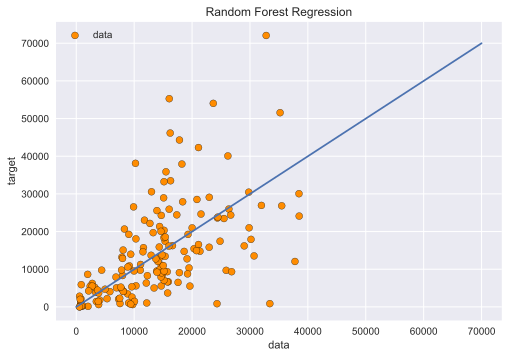

In [88]:
y_2 = RF_reg_grid.predict(X_test)
X_test.sort_index(inplace=True)
# Plot the results
plt.figure()
plt.scatter(y_2, y_test, edgecolor="black", c="darkorange", label="data")
x= np.arange(0, 70000)
plt.plot(x,x)
#plt.scatter(X_test, y_2, color="yellowgreen", label="max_depth=3")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Random Forest Regression")
plt.legend()
plt.show()

In [89]:
X = bix_sta_prox.drop(['number of trips', 'pk', 'name', 'longitude', 'latitude', 'Rec prox count', 'public prox count', 'Distance from center', 'Cultural prox count', 'Commercial prox count'], axis=1)
y = bix_sta_prox['number of trips']

X_CV, X_test, y_CV, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

X_train, X_valid, y_train, y_valid = train_test_split(X_CV,y_CV, test_size=0.2, random_state=1)

In [90]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
estimator = [('model', RandomForestRegressor())]
pipe = Pipeline(estimator)

param_grid = [{
    'model' : [RandomForestRegressor()],
    'model__n_estimators' : [25, 50, 100],
    'model__max_depth' : [2, 3, 4, 5],
    'model__min_samples_leaf' : [1, 2, 3, 4, 5],
    'model__criterion' : ['squared_error']
}]

grid = GridSearchCV(pipe, param_grid, cv=5, verbose=1)

fittedgrid = grid.fit(X_valid, y_valid)
fittedgrid.best_params_

Fitting 5 folds for each of 60 candidates, totalling 300 fits


{'model': RandomForestRegressor(max_depth=4, min_samples_leaf=4),
 'model__criterion': 'squared_error',
 'model__max_depth': 4,
 'model__min_samples_leaf': 4,
 'model__n_estimators': 100}

In [91]:
RF_reg_grid = RandomForestRegressor(max_depth= 4, min_samples_leaf=3, n_estimators=50)

RF_reg_grid.fit(X_train, y_train)
print(f"The accuracy of the model on trainig data, with optimised parameters is {RF_reg_grid.score(X_train, y_train)}")
print(f"The accuracy of the model on validation data, with optimised parameters is {RF_reg_grid.score(X_valid, y_valid)}")
from sklearn.metrics import mean_absolute_error
print(f"The mean absolute error of the model on testing data, with optimised parameters is {mean_absolute_error(y_valid, RF_reg_grid.predict(X_valid))}")


The accuracy of the model on trainig data, with optimised parameters is 0.5398707315645618
The accuracy of the model on validation data, with optimised parameters is 0.3786646391575179
The accuaracy of the model on testing data , with optimised parameters is 0.4056290033515807
The mean absolute error of the model on testing data, with optimised parameters is 6799.224031066643


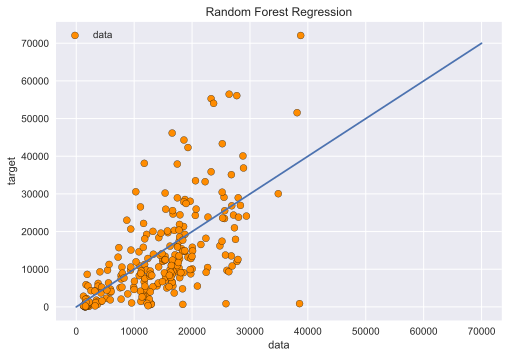

In [92]:
y_2 = RF_reg_grid.predict(X_valid)
X_test.sort_index(inplace=True)
# Plot the results
plt.figure()
plt.scatter(y_2, y_test, edgecolor="black", c="darkorange", label="data")
x= np.arange(0, 70000)
plt.plot(x,x)
#plt.scatter(X_test, y_2, color="yellowgreen", label="max_depth=3")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Random Forest Regression")
plt.legend()
plt.show()

Text(0, 0.5, 'Frequency')

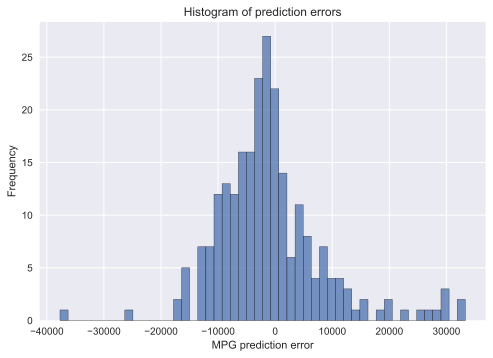

In [93]:
diff = y_test.values - y_2
sns.histplot(diff, bins = 50)
plt.title('Histogram of prediction errors')
plt.xlabel('MPG prediction error')
plt.ylabel('Frequency')

In [95]:
X = bix_sta_prox.drop(['number of trips', 'pk', 'name', 'longitude', 'latitude', 'Rec prox count', 'public prox count', 'Distance from center', 'Cultural prox count', 'Commercial prox count'], axis=1)
y = bix_sta_prox['number of trips']

X_CV, X_test, y_CV, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

X_train, X_valid, y_train, y_valid = train_test_split(X_CV,y_CV, test_size=0.3, random_state=1)

In [96]:
from sklearn.ensemble import GradientBoostingRegressor
estimator = [('model', GradientBoostingRegressor())]
pipe = Pipeline(estimator)

param_grid = [{
    'model' : [GradientBoostingRegressor()],
    'model__n_estimators' : [5, 10, 15, 25, 50],
    'model__max_depth' : [1, 2, 3, 4, 5],
    'model__min_samples_leaf' : [ 3, 4, 5, 6],
    'model__learning_rate' : [ 0.2, 0.25,0.3, 0.35],
    'model__loss' : ['squared_error', 'absolute_error']
}]

grid = GridSearchCV(pipe, param_grid, cv=5, verbose=1)

fittedgrid = grid.fit(X_train, y_train)
fittedgrid.best_params_

Fitting 5 folds for each of 800 candidates, totalling 4000 fits


{'model': GradientBoostingRegressor(learning_rate=0.35, min_samples_leaf=4,
                           n_estimators=10),
 'model__learning_rate': 0.35,
 'model__loss': 'squared_error',
 'model__max_depth': 3,
 'model__min_samples_leaf': 4,
 'model__n_estimators': 10}

In [97]:
Grad_reg = GradientBoostingRegressor(learning_rate=0.35, max_depth=3, min_samples_leaf=4, n_estimators=10)
Grad_reg.fit(X_CV, y_CV)

print(f"The accuracy of the model on training data, with optimised parameters is {Grad_reg.score(X_train, y_train)}")
print(f"The accuaracy of the model on testing data , with optimised parameters is {Grad_reg.score(X_valid, y_valid)}")

The accuracy of the model on training data, with optimised parameters is 0.588834839909929
The accuaracy of the model on testing data , with optimised parameters is 0.3590480875782184


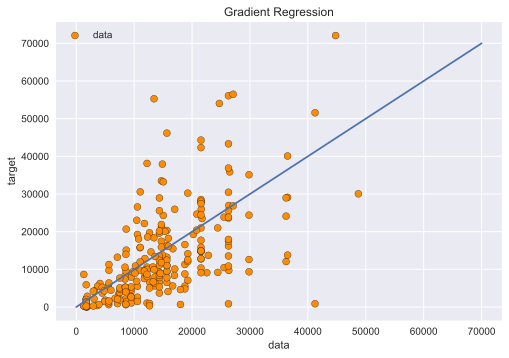

In [98]:
y_2 = Grad_reg.predict(X_test)
X_test.sort_index(inplace=True)
# Plot the results
plt.figure()
plt.scatter(y_2, y_test, edgecolor="black", c="darkorange", label="data")
x= np.arange(0, 70000)
plt.plot(x,x)
#plt.scatter(X_test, y_2, color="yellowgreen", label="max_depth=3")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Gradient Regression")
plt.legend()
plt.show()

Text(0, 0.5, 'Frequency')

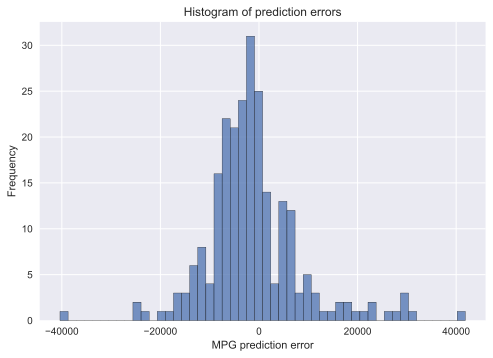

In [99]:
diff = y_test.values - y_2
sns.histplot(diff, bins = 50)
plt.title('Histogram of prediction errors')
plt.xlabel('MPG prediction error')
plt.ylabel('Frequency')

In [100]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_2)

6973.050861008041

In [101]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
AB_booster =  AdaBoostRegressor()
estimator = [('model', AdaBoostRegressor())]
pipe = Pipeline(estimator)


param_grid = [{
    'model' : [AdaBoostRegressor()],
    'model__base_estimator' : [DecisionTreeRegressor(max_depth=3), DecisionTreeRegressor(max_depth=4), DecisionTreeRegressor(max_depth=5), DecisionTreeRegressor(max_depth=6), DecisionTreeRegressor(max_depth=7)],
    'model__n_estimators' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'model__learning_rate' : [ 0.005 ,0.05, 0.1, 0.15, 0.2, 0.25,0.3, 0.35],
    'model__loss' : ['square', 'exponential']
}]

grid = GridSearchCV(pipe, param_grid, cv=5, verbose=1)

fittedgrid = grid.fit(X_CV, y_CV)
fittedgrid.best_params_

Fitting 5 folds for each of 800 candidates, totalling 4000 fits


{'model': AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=5),
                   learning_rate=0.005, loss='exponential', n_estimators=80),
 'model__base_estimator': DecisionTreeRegressor(max_depth=5),
 'model__learning_rate': 0.005,
 'model__loss': 'exponential',
 'model__n_estimators': 80}

In [102]:
from sklearn.metrics import mean_absolute_error
AB_boost = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=4), learning_rate=0.005, loss = 'expoential', n_estimators = 80)
AB_boost.fit(X_CV, y_CV)
print(f"The accuracy of the model on training data, with optimised parameters is {AB_boost.score(X_CV, y_CV)}")
print(f"The accuaracy of the model on testing data , with optimised parameters is {AB_boost.score(X_test, y_test)}")
print(f"The Mean Absolute Error of the model on testing data with optimised parameters it {mean_absolute_error(y_test,AB_boost.predict(X_test))}")

The accuracy of the model on training data, with optimised parameters is 0.5187929275474044
The accuaracy of the model on testing data , with optimised parameters is -0.3734268643284193
The Mean Absolute Error of the model on testing data with optimised parameters it 10689.866924745062


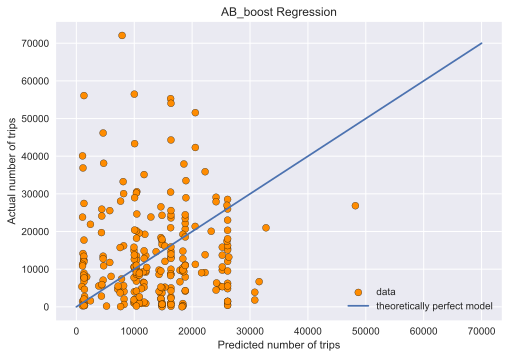

In [103]:
y_2 = AB_boost.predict(X_test)
X_test.sort_index(inplace=True)
# Plot the results
plt.figure()
plt.scatter(y_2, y_test, edgecolor="black", c="darkorange", label="data")
x= np.arange(0, 70000)
plt.plot(x,x, label = 'theoretically perfect model')
#plt.scatter(X_test, y_2, color="yellowgreen", label="max_depth=3")
plt.xlabel("Predicted number of trips")
plt.ylabel("Actual number of trips")
plt.title("AB_boost Regression")
plt.legend()
plt.show()

Text(0, 0.5, 'Frequency')

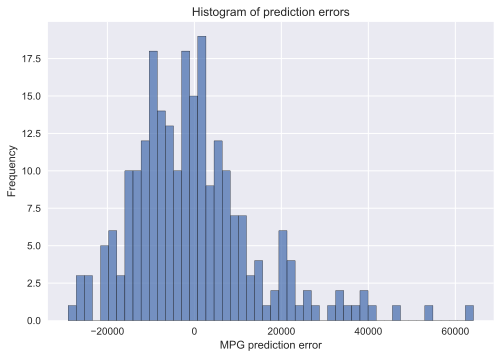

In [104]:
diff = y_test.values - y_2
sns.histplot(diff, bins = 50)
plt.title('Histogram of prediction errors')
plt.xlabel('MPG prediction error')
plt.ylabel('Frequency')